$\textbf{PROGRAMMING ASSIGNMENT}$
---
Instructions:
-

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [9]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install KModes

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
# data (as pandas dataframes) 
X = soybean_large.data.features 
y = soybean_large.data.targets 
  
# metadata 
#print(soybean_large.metadata) 
  
# variable information 
print(soybean_large.variables) 

               name     role         type demographic  \
0             class   Target  Categorical        None   
1              date  Feature  Categorical        None   
2       plant-stand  Feature  Categorical        None   
3            precip  Feature  Categorical        None   
4              temp  Feature  Categorical        None   
5              hail  Feature  Categorical        None   
6         crop-hist  Feature  Categorical        None   
7      area-damaged  Feature  Categorical        None   
8          severity  Feature  Categorical        None   
9          seed-tmt  Feature  Categorical        None   
10      germination  Feature  Categorical        None   
11     plant-growth  Feature  Categorical        None   
12           leaves  Feature  Categorical        None   
13   leafspots-halo  Feature  Categorical        None   
14   leafspots-marg  Feature  Categorical        None   
15    leafspot-size  Feature  Categorical        None   
16      leaf-shread  Feature  C

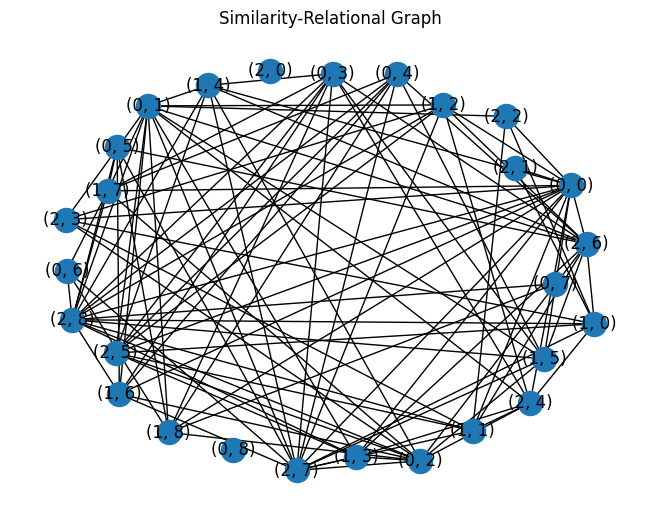

c:\Users\Bianca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:662: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


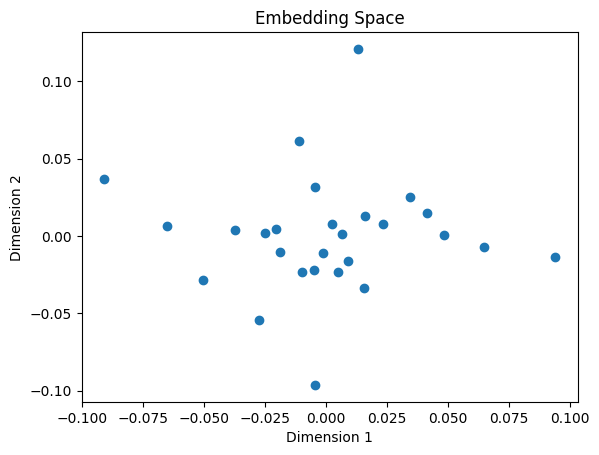

Embedding Matrix:
 [[-0.02038959  0.00443961]
 [ 0.00235509  0.00753133]
 [ 0.01295348  0.12095861]
 [-0.0190068  -0.01060838]
 [-0.00126255 -0.01065159]
 [-0.02740957 -0.0541775 ]
 [ 0.09383948 -0.0137342 ]
 [ 0.01573121  0.01305534]
 [-0.00518676 -0.02181024]
 [-0.06512719  0.00625805]
 [ 0.04124529  0.01493797]
 [ 0.02329234  0.00775085]
 [-0.00989062 -0.02295434]
 [-0.01123123  0.06161959]
 [-0.0044022   0.03192497]
 [ 0.00914096 -0.01621355]
 [ 0.04810619  0.00090231]
 [-0.03743533  0.00394682]
 [ 0.01562717 -0.03381894]
 [ 0.06488632 -0.00716777]
 [-0.05034742 -0.02856062]
 [ 0.00467491 -0.02310848]
 [-0.090984    0.03683498]
 [-0.02515859  0.00209513]
 [ 0.00636458  0.00142722]
 [-0.00454597 -0.09623991]
 [ 0.03416079  0.02536273]]


In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embed(X, embed_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embed_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embed_matrix: array-like, shape (n_samples * n_features, embed_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embed = SpectralEmbedding(n_components=embed_dim)
    embed_matrix = spectral_embed.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embed_matrix[:, 0], embed_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embed_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embed_matrix = graph_embed(X)
print("Embedding Matrix:\n", embed_matrix)


In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from sklearn.impute import SimpleImputer

# Data 
X = soybean_large.data.features 
y = soybean_large.data.targets 

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Function to perform clustering and calculate performance indices
def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true))).fit(X)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    
    return ari, nmi, fmi

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Perform clustering and evaluate with different methods
ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

# Print the results
print("KMeans:")
print("{:<40} {:>10.10f}".format("Adjusted Rand Index (ARI):", ari_kmeans))
print("{:<40} {:>10.10f}".format("Normalized Mutual Information (NMI):", nmi_kmeans))
print("{:<40} {:>10.10f}".format("Folkes-Mallows Index (FMI):", fmi_kmeans))

print("\nHierarchical Clustering:")
print("{:<40} {:>10.10f}".format("Adjusted Rand Index (ARI):", ari_hierarchical))
print("{:<40} {:>10.10f}".format("Normalized Mutual Information (NMI):", nmi_hierarchical))
print("{:<40} {:>10.10f}".format("Folkes-Mallows Index (FMI):", fmi_hierarchical))

KMeans:
Adjusted Rand Index (ARI):               0.4000654606
Normalized Mutual Information (NMI):     0.6674509421
Folkes-Mallows Index (FMI):              0.4475836733

Hierarchical Clustering:
Adjusted Rand Index (ARI):               0.4818572638
Normalized Mutual Information (NMI):     0.7714741802
Folkes-Mallows Index (FMI):              0.5238794515


$\textbf{Adjusted Rand Index (ARI):}$

$\textbf{Advantages:}$
- This checks how similar two clustering results are by looking at all pairs of samples and their cluster memberships. It adjusts for random chance by comparing the expected similarity of random clusters to the actual clustering. ARI values range from -1 to 1, where 1 means the clusterings are perfectly similar.
$\textbf{Disadvantages:}$
- Although, ARI doesn't directly consider the true labels of the data, so it can be sensitive to the number and sizes of clusters. It is not normalized and can be negative, making it harder to interpret.

$\textbf{When to use:}$
- It is useful when you have ground truth labels and want to measure how similar the predicted clusters are to these true labels. It is often used to evaluate clustering algorithms when ground truth is available.
<br>

$\textbf{Normalized Mutual Information (NMI):}$

$\textbf{Advantages:}$
- While this measures the mutual dependence between true labels and predicted clusters, adjusting for chance. It is normalized, always falling between 0 and 1, with 1 meaning perfect agreement between clustering and true labels.NMI is symmetric, meaning the order of true labels and predicted clusters does not affect the result.

$\textbf{Disadvantages:}$
- Although, NMI can be biased towards clusters of similar sizes and may not penalize over-fragmentation or under-fragmentation adequately.

$\textbf{When to use:}$
- NMI is best to use when evaluating the overall agreement between true labels and predicted clusters, regardless of the number and sizes of clusters. It is useful when ground truth is available but the number of clusters can vary.
<br>

$\textbf{Folkes-Mallows Index (FMI):}$

$\textbf{Advantages:}$
- So, FMI measures the geometric mean of precision and recall of clustering relative to true classes. It provides a balanced evaluation by considering both false positives and false negatives.

$\textbf{Disadvantages:}$
- This is not as common or as well-known as ARI or NMI.

$\textbf{When to use:}$
- FMI is used for a balanced evaluation of precision and recall in clustering. It is particularly relevant when false positives and false negatives have different impacts in your application.

In [17]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer

# Define a function to evaluate clustering performance
def evaluate_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Cao', n_init=5, verbose=0)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)))
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    
    return ari, nmi, fmi

# Load your dataset and preprocess if needed
# Assuming you have your dataset loaded into X and y variables

# One-hot encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Impute missing values if needed
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Convert y to a 1-dimensional pandas Series
y_series = y.squeeze()

# Perform clustering and evaluate with different methods
ari_kmodes, nmi_kmodes, fmi_kmodes = evaluate_clustering(X_imputed, y_series, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y_series, method='hierarchical')

# Print the results
print("KModes Clustering:")
print("{:<40} {:>10.10f}".format("Adjusted Rand Index (ARI):", ari_kmodes))
print("{:<40} {:>10.10f}".format("Normalized Mutual Information (NMI):", nmi_kmodes))
print("{:<40} {:>10.10f}".format("Folkes-Mallows Index (FMI):", fmi_kmodes))

print("\nHierarchical Clustering:")
print("{:<40} {:>10.10f}".format("Adjusted Rand Index (ARI):", ari_hierarchical))
print("{:<40} {:>10.10f}".format("Normalized Mutual Information (NMI):", nmi_hierarchical))
print("{:<40} {:>10.10f}".format("Folkes-Mallows Index (FMI):", fmi_hierarchical))


KModes Clustering:
Adjusted Rand Index (ARI):               0.3674861601
Normalized Mutual Information (NMI):     0.6915333230
Folkes-Mallows Index (FMI):              0.4248595993

Hierarchical Clustering:
Adjusted Rand Index (ARI):               0.4818572638
Normalized Mutual Information (NMI):     0.7714741802
Folkes-Mallows Index (FMI):              0.5238794515


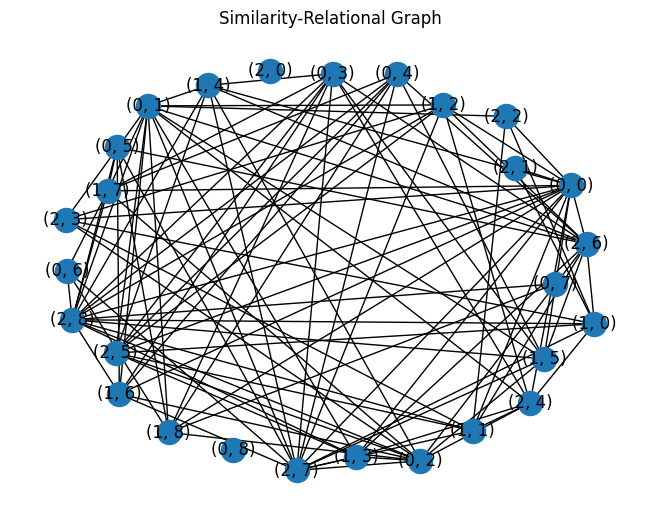

c:\Users\Bianca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:662: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


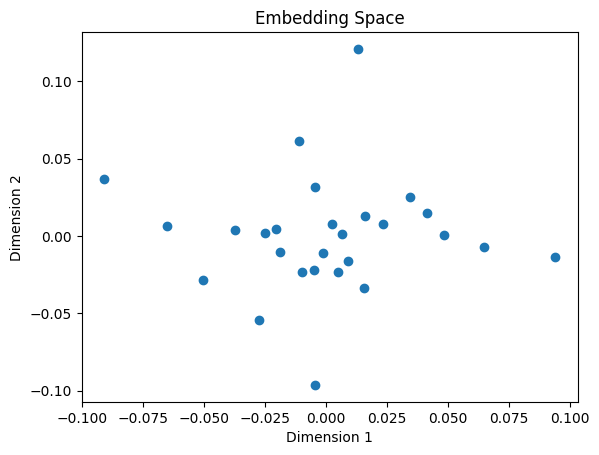

Embedding Matrix:
 [[-0.02038959  0.00443961]
 [ 0.00235509  0.00753133]
 [ 0.01295348  0.12095861]
 [-0.0190068  -0.01060838]
 [-0.00126255 -0.01065159]
 [-0.02740957 -0.0541775 ]
 [ 0.09383948 -0.0137342 ]
 [ 0.01573121  0.01305534]
 [-0.00518676 -0.02181024]
 [-0.06512719  0.00625805]
 [ 0.04124529  0.01493797]
 [ 0.02329234  0.00775085]
 [-0.00989062 -0.02295434]
 [-0.01123123  0.06161959]
 [-0.0044022   0.03192497]
 [ 0.00914096 -0.01621355]
 [ 0.04810619  0.00090231]
 [-0.03743533  0.00394682]
 [ 0.01562717 -0.03381894]
 [ 0.06488632 -0.00716777]
 [-0.05034742 -0.02856062]
 [ 0.00467491 -0.02310848]
 [-0.090984    0.03683498]
 [-0.02515859  0.00209513]
 [ 0.00636458  0.00142722]
 [-0.00454597 -0.09623991]
 [ 0.03416079  0.02536273]]


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embed(X, embed_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embed_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embed_matrix: array-like, shape (n_samples * n_features, embed_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embed = SpectralEmbedding(n_components=embed_dim)
    embed_matrix = spectral_embed.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embed_matrix[:, 0], embed_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embed_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embed_matrix = graph_embed(X)
print("Embedding Matrix:\n", embed_matrix)


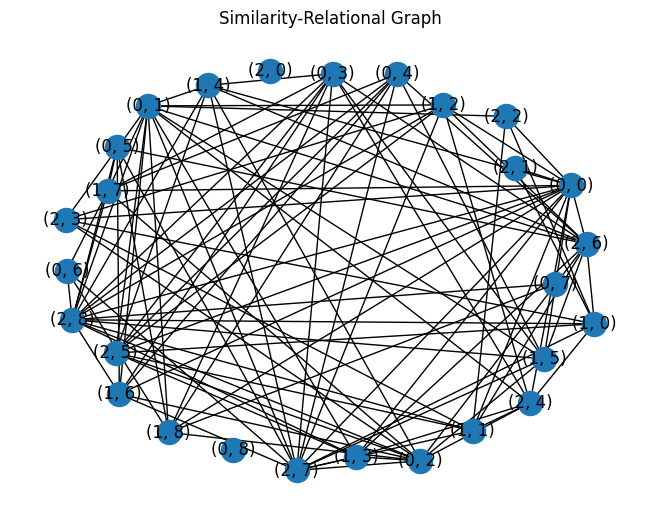

c:\Users\Bianca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:662: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


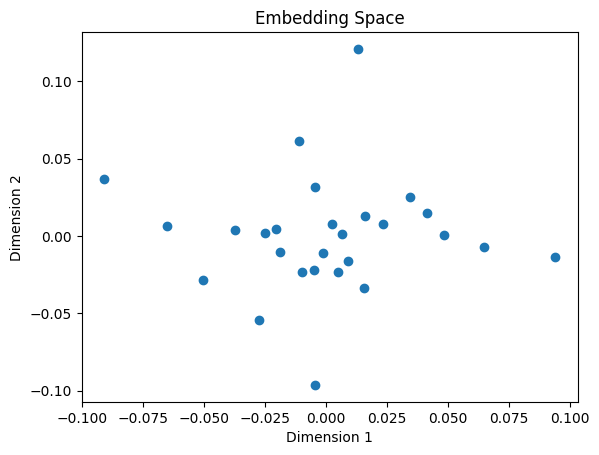

Embedding Matrix:
 [[-0.02038959  0.00443961]
 [ 0.00235509  0.00753133]
 [ 0.01295348  0.12095861]
 [-0.0190068  -0.01060838]
 [-0.00126255 -0.01065159]
 [-0.02740957 -0.0541775 ]
 [ 0.09383948 -0.0137342 ]
 [ 0.01573121  0.01305534]
 [-0.00518676 -0.02181024]
 [-0.06512719  0.00625805]
 [ 0.04124529  0.01493797]
 [ 0.02329234  0.00775085]
 [-0.00989062 -0.02295434]
 [-0.01123123  0.06161959]
 [-0.0044022   0.03192497]
 [ 0.00914096 -0.01621355]
 [ 0.04810619  0.00090231]
 [-0.03743533  0.00394682]
 [ 0.01562717 -0.03381894]
 [ 0.06488632 -0.00716777]
 [-0.05034742 -0.02856062]
 [ 0.00467491 -0.02310848]
 [-0.090984    0.03683498]
 [-0.02515859  0.00209513]
 [ 0.00636458  0.00142722]
 [-0.00454597 -0.09623991]
 [ 0.03416079  0.02536273]]


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embed(X, embed_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embed_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embed_matrix: array-like, shape (n_samples * n_features, embed_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embed = SpectralEmbedding(n_components=embed_dim)
    embed_matrix = spectral_embed.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embed_matrix[:, 0], embed_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embed_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embed_matrix = graph_embed(X)
print("Embedding Matrix:\n", embed_matrix)


<br>

$\textbf{Report Intro}$
<br>
So Clustering is a fundamental part of unsupervised learning, involves grouping similar data points based on shared characteristics. To determine if clustering algorithms effectively categorize data, it’s important to evaluate their performance. Here in this report, it explores three common metrics used to assess clustering performance, which are: the Folkes-Mallows Index (FMI), Normalized Mutual Information (NMI), and Adjusted Rand Index (ARI). We will discuss the reasoning behind each metric, their advantages and disadvantages, and when to use them.

$\textbf{
Adjusted Rand Index (ARI)}$:
- measures how similar two clustering results are by looking at all pairs of samples and their cluster memberships. It accounts for chance by comparing the expected similarity of random clusters to the actual clustering.

$\textbf{
Advantage}$:
- This checks how similar two clustering results are by looking at all pairs of samples and their cluster memberships. It adjusts for random chance by comparing the expected similarity of random clusters to the actual clustering. ARI values range from -1 to 1, where 1 means the clusterings are perfectly similar.

$\textbf{
Disadvantage}$:
- Although, ARI doesn't directly consider the true labels of the data, so it can be sensitive to the number and sizes of clusters. It is not normalized and can be negative, making it harder to interpret.

$\textbf{
Normalized Mutual Information (NMI)}$:
- measures the dependence between true labels and predicted clusters, adjusting for chance. It provides a normalized measure of agreement between two clustering results, ranging from 0 to 1, with 1 indicating perfect agreement.

$\textbf{
Advantage}$:
- While this measures the mutual dependence between true labels and predicted clusters, adjusting for chance. It is normalized, always falling between 0 and 1, with 1 meaning perfect agreement between clustering and true labels.NMI is symmetric, meaning the order of true labels and predicted clusters does not affect the result.

$\textbf{
Disadvantage}$:
- Although, NMI can be biased towards clusters of similar sizes and may not penalize over-fragmentation or under-fragmentation adequately.

$\textbf{
Folkes-Mallows Index (FMI)}$:
- measures the geometric mean of precision and recall for clustering compared to true classes. It provides a balanced evaluation by considering both false positives and false negatives.

$\textbf{
Advantage}$:
- So, FMI measures the geometric mean of precision and recall of clustering relative to true classes. It offers a balanced evaluation of both precision and recall, considering both false positives and false negatives.

$\textbf{
Disadvantage}$:
- This is not as common or as well-known as ARI or NMI, which may lead to less familiarity among practitioners.

$\textbf{Report Conclusion}
$<br>
To conclude, each clustering performance metric has its own strengths and weaknesses. First, ARI is useful for evaluating clustering methods when ground truth labels are available, but its performance can be influenced by the number and size of clusters. Secondly, NMI provides a normalized measure of agreement between true and predicted clusters, though it may favor clusters of similar sizes. Lastly, FMI offers a balanced assessment of precision and recall, highlighting both false positives and false negatives. Understanding the characteristics of each metric is essential for selecting the best one based on the specific requirements of the clustering task.